PROJECT - Model to predict the price of new house using Linear regression

In [10]:
import pandas as pd
import numpy as np

In [11]:
data=pd.read_csv("/content/Housing.csv")

In [12]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


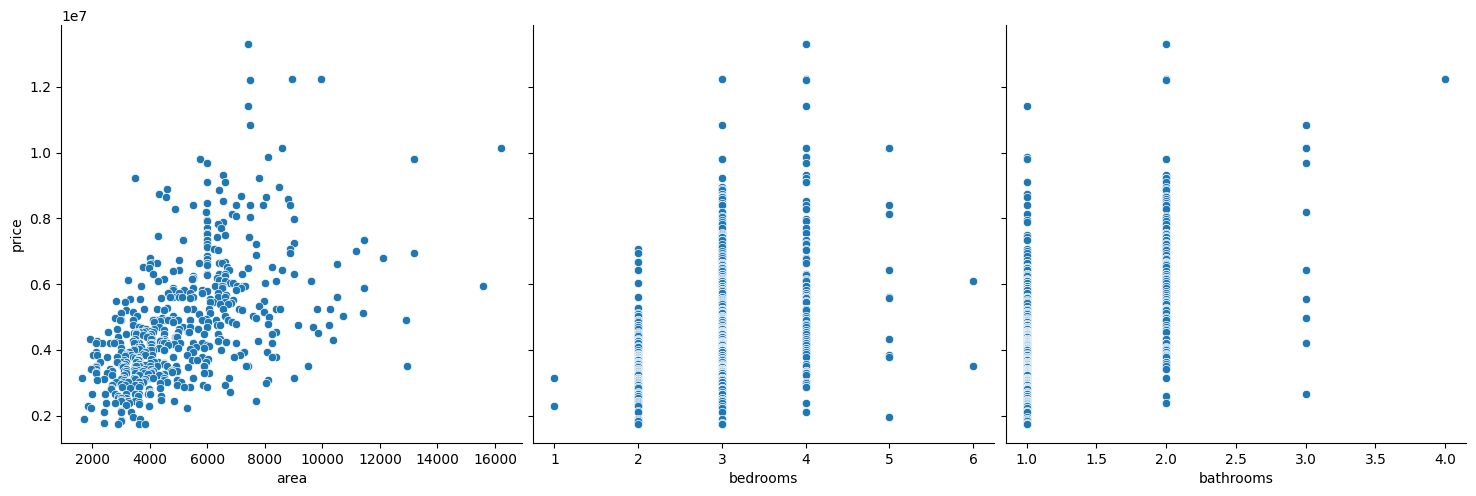

In [14]:
sns.pairplot(data,x_vars=['area','bedrooms','bathrooms'],y_vars='price',size=5)

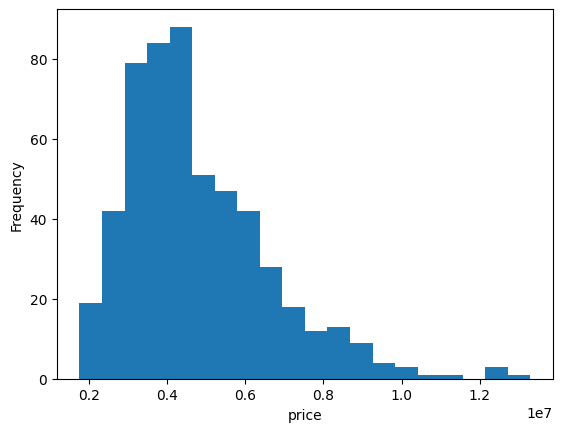

In [15]:
plt.hist(data['price'], bins=20)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

In [16]:
#DATA CLEANING
#Converting categorical data into numerical format

data['mainroad']=data['mainroad'].apply({'yes':1,'no':0}.get)
data['guestroom']=data['guestroom'].apply({'yes':1,'no':0}.get)
data['basement']=data['basement'].apply({'yes':1,'no':0}.get)
data['hotwaterheating']=data['hotwaterheating'].apply({'yes':1,'no':0}.get)
data['airconditioning']=data['airconditioning'].apply({'yes':1,'no':0}.get)
data['prefarea']=data['prefarea'].apply({'yes':1,'no':0}.get)
data['furnishingstatus']=data['furnishingstatus'].apply({'furnished':1,'semi-furnished':2,'unfurnished':3}.get)

In [17]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [18]:
data['total_area'] = data['area'] + data['parking']

In [19]:
#Diving the data into dependent and independent variable
x=data[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus','total_area']]#independent variable
y=data['price']#dependent variable

In [20]:
# Spliting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [21]:
#Creating SMLM using linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [22]:
regression.fit(x_train,y_train)#training the algorithm

LinearRegression()

In [23]:
y_pred=regression.predict(x_test)

In [24]:
regression.score(x,y)

0.6763367647020881

In [25]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(x_train,y_train)

Ridge()

In [26]:
y_prediction=ridge_model.predict(x_test)

In [27]:
ridge_model.score(x,y)

0.6761738705009326

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.6494754192276331


In [29]:
#New data
new_data={'area':7000,'bedrooms':3,'bathrooms':2,'stories':2,'mainroad':0,'guestroom':0,'basement':0,'hotwaterheating':0,'airconditioning':0,'parking':2,'prefarea':0,'furnishingstatus':2,'total_area':7200}
new_data_df=pd.DataFrame([new_data])

In [30]:
y_prediction=regression.predict(new_data_df)
print(y_prediction)

[20343040.66111412]


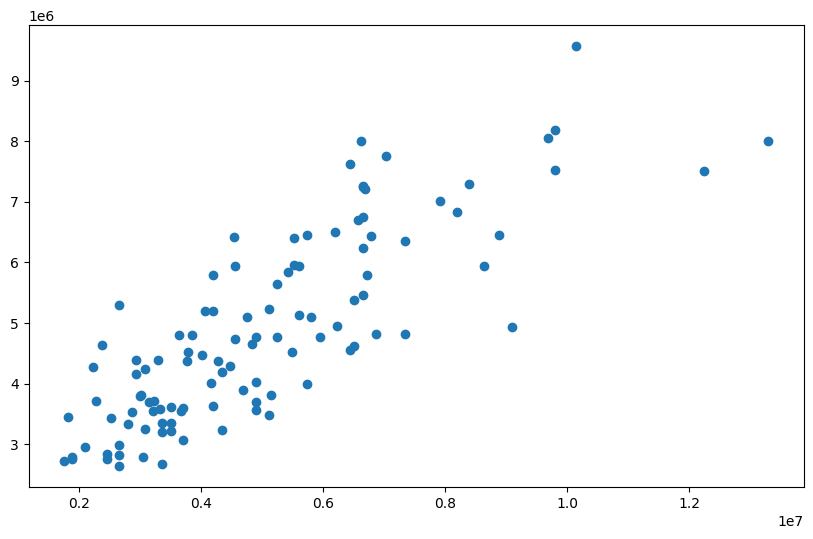

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
randomforest=RandomForestRegressor()

In [34]:
randomforest.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
rf_prediction=randomforest.predict(x_test)

In [36]:
randomforest.score(x,y)

0.8530776020160432

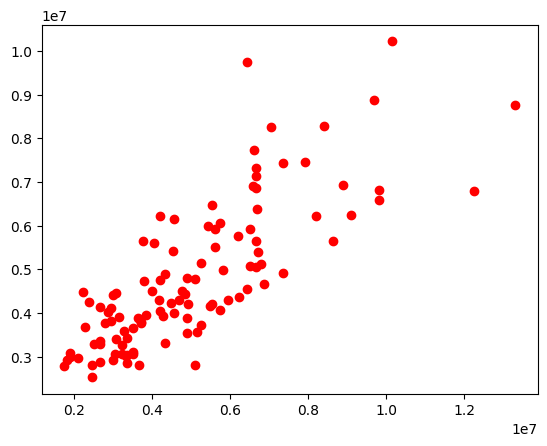

In [37]:
plt.scatter(y_test,rf_prediction,color='red')

In [38]:
r2 = r2_score(y_test, rf_prediction)
print("R-squared:", r2)

R-squared: 0.6166989007372324
